In [211]:
import pandas as pd
import numpy as np
df_plcm = pd.read_excel('data/ALDI.xlsx','Map')
# df_perf= pd.read_excel('data/ALDI.xlsx','Data')
df_raw = pd.read_pickle('data/aldi_aggregate_data.p')


preprocess df_plcm  as df_plcm_cleaned

In [472]:
df_plcm_cleaned = df_raw.drop('Media',axis=1).rename(columns = {
    'Ad Group/Media Type':'AdGroup','Media Spending':'Daily_Cost','Guangxiaobao ID':'Placement_Id',
    'Product ID':'Product_Id','Product Category':'Product_Cat','Day':'Date','Conversion Rate':'Conversion_Rate',
    'Impressions':'Imp','Clicks':'Click','Bounce Rate':'Bounce_Rate','Complete Orders':'Complete_Orders', 'Media Type': 'Media_Type'
})
df_plcm_cleaned= df_plcm_cleaned.replace(0, np.nan)
df_plcm_cleaned.columns

Index(['Date', 'Month', 'Media_Type', 'AdGroup', 'Placement_Id', 'Product_Id',
       'Product_Cat', 'Geo_Target', 'Device', 'IOS/AND', 'Age', 'Sex',
       'Daily_Cost', 'Imp', 'Click', 'CTR', 'CPM', 'CPC', 'UV', 'PV',
       'Favourites', 'Carts', 'Complete_Orders', 'Conversion_Rate',
       'Bounce_Rate', 'Revenue', 'ROI', 'Carts Convertion Rate',
       'Facourites Conversion Rate', 'UV/Clicks', 'CPUV'],
      dtype='object')

how much % empty value for columns

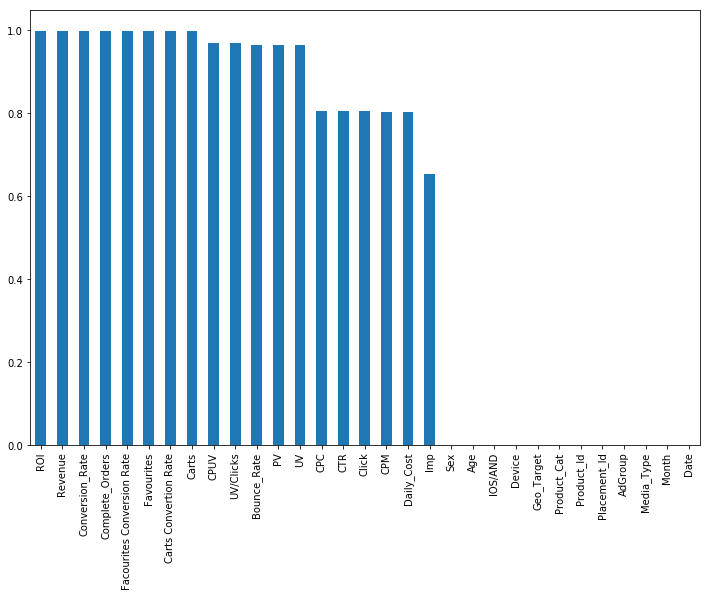

In [473]:
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline
# df_all = df_plcm_cleaned.merge(df_perf, left_on = ['Placement'], right_on='Placement')
(np.sum(df_plcm_cleaned.isnull())/ df_plcm_cleaned.shape[0]).sort_values(ascending=False).plot(kind='bar', figsize=(12,8));

drop na columns

In [474]:
df_plcm_cleaned.columns

Index(['Date', 'Month', 'Media_Type', 'AdGroup', 'Placement_Id', 'Product_Id',
       'Product_Cat', 'Geo_Target', 'Device', 'IOS/AND', 'Age', 'Sex',
       'Daily_Cost', 'Imp', 'Click', 'CTR', 'CPM', 'CPC', 'UV', 'PV',
       'Favourites', 'Carts', 'Complete_Orders', 'Conversion_Rate',
       'Bounce_Rate', 'Revenue', 'ROI', 'Carts Convertion Rate',
       'Facourites Conversion Rate', 'UV/Clicks', 'CPUV'],
      dtype='object')

In [475]:
d_cols = df_plcm_cleaned.columns[(np.sum(df_plcm_cleaned.isnull())/ df_plcm_cleaned.shape[0])>.99]
df_plcm_cleaned = df_plcm_cleaned.drop(d_cols, axis=1)
print(d_cols)
df_plcm_cleaned.head()                                       

Index(['Favourites', 'Carts', 'Complete_Orders', 'Conversion_Rate', 'Revenue',
       'ROI', 'Carts Convertion Rate', 'Facourites Conversion Rate'],
      dtype='object')


,Date,Month,Media_Type,AdGroup,Placement_Id,Product_Id,Product_Cat,Geo_Target,Device,IOS/AND,...,Imp,Click,CTR,CPM,CPC,UV,PV,Bounce_Rate,UV/Clicks,CPUV
0,2017-04-24,Apr,Engage,树下频道 首页中部通栏2轮换,Babytree_201705020004,5.44549E+11,Relish,National,PC,(blank),...,NaN,NaN,NaN,NaN,NaN,1.0,3.0,1.0,NaN,NaN
1,2017-04-24,Apr,Engage,APP孕育首页头图轮播第二帧,Babytree_201705020002,5.45042E+11,Organic,National,Mob,(blank),...,12678.0,NaN,NaN,34.550305,NaN,162.0,169.0,1.0,NaN,2.703881
2,2017-04-24,Apr,Engage,万家频道精彩日记页中部横幅2轮换,Babytree_201705020005,5.44549E+11,Relish,National,PC,(blank),...,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,NaN,NaN
3,2017-04-24,Apr,Engage,宝宝树首页,Babytree_201705020001,5.45042E+11,Organic,National,PC,(blank),...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN
4,2017-04-24,Apr,Engage,开机大图,Babytree_201705020003,5.45042E+11,Organic,National,Mob,(blank),...,5482.0,NaN,NaN,55.501310,NaN,411.0,431.0,1.0,NaN,0.740288


remove rows if cost is 0

In [476]:
df_plcm_filtered = df_plcm_cleaned[df_plcm_cleaned.Daily_Cost>10]
df_plcm_filtered.shape

(40571, 23)

add additional features about placement

In [477]:
df_plcm.columns

Index(['Campaign_Name', 'Campaign ID', 'Category', 'Media', 'Platform',
       'Campaign', 'Ad Group/Media Type', 'Device', 'Site',
       'Impressions Tracking', 'Clicks Tracking', 'Guangxiaobao ID', 'SPID',
       'Placement Name', 'Package', 'Location', 'ID_Buy', 'Geo_Target',
       'Product Category', 'Product ID', 'keywords', 'Sex', 'Age', 'IOS/AND',
       'Buying Type', 'Placement_Est_Daily_Imp', 'Placement_Est_Daily_Clicks',
       'Est_Total_Imp', 'Est_CTR', 'Planned_Cost', 'EST.CPC', 'EST.CPM',
       'Days', 'Flight_Start', 'Flight_End'],
      dtype='object')

In [481]:
df_plcm_short = df_plcm[['Guangxiaobao ID','Site','Placement Name']].rename(columns={'Guangxiaobao ID':'Placement_Id','Placement Name':'Placement'})
df_plcm_comb = df_plcm_filtered.merge(df_plcm_short, on = 'Placement_Id').rename(columns={'Site':'Media'})
df_plcm_comb.columns

Index(['Date', 'Month', 'Media_Type', 'AdGroup', 'Placement_Id', 'Product_Id',
       'Product_Cat', 'Geo_Target', 'Device', 'IOS/AND', 'Age', 'Sex',
       'Daily_Cost', 'Imp', 'Click', 'CTR', 'CPM', 'CPC', 'UV', 'PV',
       'Bounce_Rate', 'UV/Clicks', 'CPUV', 'Media', 'Placement'],
      dtype='object')

In [482]:
# cummulated numbers
# cost
import warnings
warnings.filterwarnings('ignore')
def add_ts_features(df_plac_perf):
    df_cum_cost= df_plac_perf.set_index(['Placement_Id','Date']).groupby(level=0)['Daily_Cost'].transform(lambda g: g.shift(1).cumsum()).rename('Cum_Daily_Cost').to_frame().reset_index()
    df_plac_perf = pd.merge(df_plac_perf, df_cum_cost, on = ['Placement_Id','Date'])
    # imp
    df_cum_cost= df_plac_perf.set_index(['Placement_Id','Date']).groupby(level=0)['Imp'].transform(lambda g: g.shift(1).cumsum()).rename('Cum_Imp').to_frame().reset_index()
    df_plac_perf = pd.merge(df_plac_perf, df_cum_cost, on = ['Placement_Id','Date'])
    # clk
    df_cum_cost= df_plac_perf.set_index(['Placement_Id','Date']).groupby(level=0)['Click'].transform(lambda g: g.shift(1).cumsum()).rename('Cum_Click').to_frame().reset_index()
    df_plac_perf = pd.merge(df_plac_perf, df_cum_cost, on = ['Placement_Id','Date'])
    # clk
    df_cum_cost= df_plac_perf.set_index(['Placement_Id','Date']).groupby(level=0)['UV'].transform(lambda g: g.shift(1).cumsum()).rename('Cum_UV').to_frame().reset_index()
    df_plac_perf = pd.merge(df_plac_perf, df_cum_cost, on = ['Placement_Id','Date'])
    # visits
    df_cum_visits= df_plac_perf.set_index(['Placement_Id','Date']).groupby(level=0)['PV'].transform(lambda g: g.shift(1).cumsum()).rename('Cum_PV').to_frame().reset_index()
    df_plac_perf = pd.merge(df_plac_perf, df_cum_visits, on = ['Placement_Id','Date'])    
    
    ## calculate
    df_plac_perf['Cum_CTR'] = df_plac_perf['Cum_Click']/df_plac_perf['Cum_Imp'] * 100
    df_plac_perf['Cum_CPM'] = df_plac_perf['Cum_Daily_Cost']/df_plac_perf['Cum_Imp'] * 100
#     df_plac_perf['Imp_Complete%'] = df_plac_perf['Cum_Imp'] / df_plac_perf['Total_Est_Imp']
#     df_plac_perf['Imp%'] = df_plac_perf['Daily_Cost'] / df_plac_perf['Total_Cost']
    df_plac_perf['Cum_Imp2Pv'] = df_plac_perf['Cum_PV'] / df_plac_perf['Cum_Imp']

    # last 3d
    df_mediactr = df_plac_perf.groupby(['Media','Date'])['Media','Date','Cum_Imp','Cum_Click'].mean()
    df_mediactr = df_mediactr.groupby(level=0).apply(lambda g: g.shift(1).rolling(10, min_periods=1).mean()).assign(Avg_CTR_last3d = lambda o:o.Cum_Click/ o.Cum_Imp *100 )
    df_mediactr = df_mediactr.groupby(level=0).apply(lambda g: g.shift(1).rolling(10, min_periods=1).mean()).assign(Avg_CTR_last10d = lambda o:o.Cum_Click/ o.Cum_Imp *100 )
    df_mediactr = df_mediactr.drop(['Cum_Imp','Cum_Click'], axis=1).reset_index()
    df_plac_perf = pd.merge(df_plac_perf, df_mediactr, on = ['Media','Date'])
    
    return df_plac_perf

df_featured = df_plcm_comb.copy()
df_featured = add_ts_features(df_featured)

[col for col in df_featured.columns if col.startswith('Cum') or col.startswith('Avg')]


['Cum_Daily_Cost',
 'Cum_Imp',
 'Cum_Click',
 'Cum_UV',
 'Cum_PV',
 'Cum_CTR',
 'Cum_CPM',
 'Cum_Imp2Pv',
 'Avg_CTR_last3d',
 'Avg_CTR_last10d']

how much % of null vaues for new features

In [483]:
(df_featured.isnull().sum()/df_featured.shape[0]).sort_values(ascending = False).head(10)

Cum_Imp2Pv     0.874196
Cum_PV         0.874097
Cum_UV         0.874097
UV/Clicks      0.862389
Bounce_Rate    0.861650
UV             0.861502
CPUV           0.861502
PV             0.861502
Cum_CTR        0.105741
Cum_Click      0.105642
dtype: float64

(0, 10)

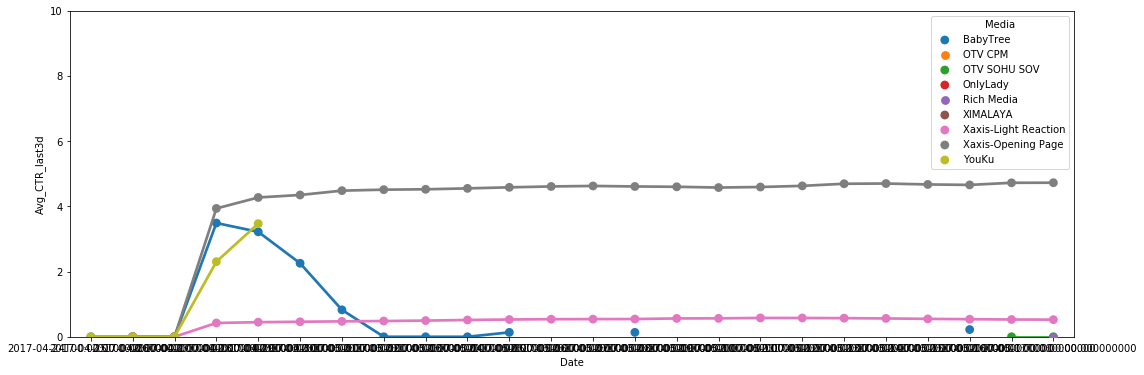

In [486]:
import seaborn as sns
sns.color_palette('Set1')
plt.figure(figsize=(18,6))
df_mediactr = df_featured.groupby(['Media','Date'])['Media','Date','Cum_Imp','Cum_Click'].mean()
df_mediactr = df_mediactr.groupby(level=0).apply(lambda g: g.shift(1).rolling(3, min_periods=1).sum()).assign(Avg_CTR_last3d = lambda o:o.Cum_Click/ o.Cum_Imp *100 )
df_mediactr = df_mediactr.reset_index()
df_mediactr['Avg_CTR_last3d'] = df_mediactr['Avg_CTR_last3d'].fillna(0.001)
sns.pointplot(data=df_mediactr[df_mediactr.Date<'2017-05-18'], x='Date', y ='Avg_CTR_last3d', hue='Media')
plt.ylim([0,10])


In [487]:
df_mediactr.Date.describe()

count                     591
unique                    247
top       2017-06-05 00:00:00
freq                        6
first     2017-04-24 00:00:00
last      2017-12-31 00:00:00
Name: Date, dtype: object

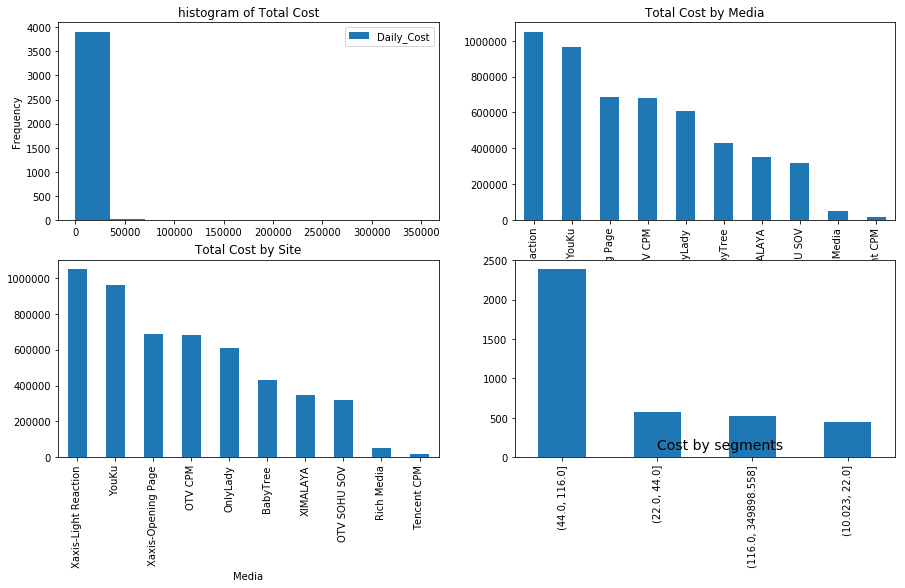

In [488]:
# segment cost; visual

# df_plac_perf['Total_Cost']=df_plac_perf.Total_Cost.fillna(0)
df_featured['qcost'] = pd.qcut( df_featured.Daily_Cost,4).astype(str)

df_plac_agg = df_featured.groupby(['Placement_Id']).max()
fig, axarr = plt.subplots(2,2, figsize=(15,8))

ax1 = df_plac_agg.plot(kind='hist', x= 'Media',y='Daily_Cost', title='histogram of Total Cost', ax=axarr[0,0])

ax2 = df_plac_agg.groupby('Media')['Daily_Cost'].sum().sort_values(ascending=False).plot(kind='bar',x='Media',y='Daily_Cost', title='Total Cost by Media',ax=axarr[0,1])

df_plac_agg.groupby('Media')['Daily_Cost'].sum().sort_values(ascending=False).plot(kind='bar',x='Media_Type',y='Daily_Cost', title='Total Cost by Site',ax=axarr[1,0])

df_plac_agg['qcost'].value_counts().plot(kind='bar',ax=axarr[1,1])
plt.text(1,100,'Cost by segments', fontsize=14);

placement count by site

In [489]:
df_plac_agg.groupby('Media').size()

Media
BabyTree                   7
OTV CPM                   24
OTV SOHU SOV               8
OnlyLady                   7
Rich Media               140
Tencent CPM                2
XIMALAYA                   1
Xaxis-Light Reaction    3685
Xaxis-Opening Page        53
YouKu                     15
dtype: int64

In [565]:
df_raw.Media.unique()

array(['BabyTree', 'OnlyLady', 'Opening Page', 'XIMALAYA', 'Youku',
       'Light Reaction', 'OTV', 'RM'], dtype=object)

In [495]:
df_featured['Daily_Cost_Log'] = stats.boxcox(df_featured.Daily_Cost)[0]
df_cpc = df_featured.query("Media =='Xaxis-Light Reaction'")
df_cpm = df_featured.query("Media !='Xaxis-Light Reaction'")
print('cpm row#:%d' % df_cpm.shape[0])
print('cpc row#:%d' % df_cpc.shape[0])

cpm row#:3841
cpc row#:36730


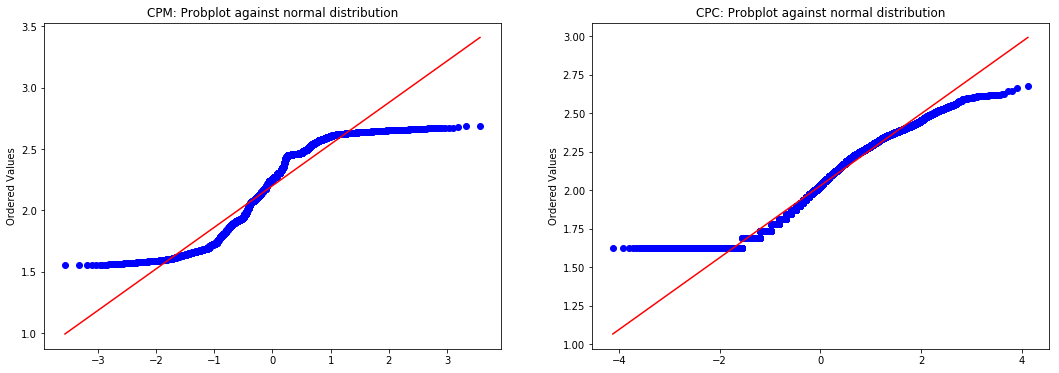

In [496]:
from scipy import stats


fig = plt.figure(figsize= (18,6))
ax1 = fig.add_subplot(121)

prob = stats.probplot(df_cpm.Daily_Cost_Log, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('CPM: Probplot against normal distribution')
ax2 = fig.add_subplot(122)
prob = stats.probplot(df_cpc.Daily_Cost_Log, dist=stats.norm, plot=ax2)
ax2.set_xlabel('')
ax2.set_title('CPC: Probplot against normal distribution')
plt.show()

查看广告位描述里的词分布

In [497]:
# 对广告位描述分词
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import jieba
import jieba.analyse as jieba_analyse
import jieba.posseg as pseg

jieba_analyse.set_stop_words('stopwords.txt') 
jieba.load_userdict('userdict.txt')

# jieba.add_word('中大型')
datas = []

df_wcut =  df_cpm[['Placement_Id','AdGroup']].mask(df_cpm.Placement_Id.str.contains('Xaxis')).drop_duplicates().dropna()
corpus = df_wcut['AdGroup'].values
for oneline in corpus:
    seg_list = pseg.cut(oneline)
#     print([",".join(w) for w in seg_list ])
    words = [w for w,c in seg_list if c not in ['v','x','f','p','ns','m','w','u'] and len(w)>1 and not w.isnumeric()]
    
    datas.append(" ".join(words))
datas[:10]

['APP 头图 轮播',
 '开机 大图',
 '宝宝',
 '精彩 媒体',
 'bigday 头图 底纹',
 '摩天大楼',
 'Loading page 全屏 开机 动态 大图',
 '媒体',
 '正在 直播 媒体',
 '直播 频道 banner1 媒体']

In [498]:
df_wcut.head()

,Placement_Id,AdGroup
0,Babytree_201705020002,APP孕育首页头图轮播第二帧
1,Babytree_201705020003,开机大图
4,Babytree_201705020001,宝宝树首页
17,Youku8,精彩邀你约--媒体提供
18,Onlylady_201705020001,首页 定制bigday（头图+底纹）大


In [499]:
# 计算tfidf
freWord = CountVectorizer()
#统计每个词语的tf-idf权值
transformer = TfidfTransformer()
#计算出tf-idf(第一个fit_transform),并将其转换为tf-idf矩阵(第二个fit_transformer)
tfidf = transformer.fit_transform(freWord.fit_transform(datas))

#获取词袋模型中的所有词语
word = freWord.get_feature_names()
#得到权重
weight = tfidf.toarray()
tfidfDict = {}
for i in range(len(weight)):
    for j in range(len(word)):
        getWord = word[j]
        
        getValue = weight[i][j]
        
        if getValue != 0:
            if tfidfDict.get(getWord):
                tfidfDict[getWord] += getValue
                
            else:
                tfidfDict.update({getWord:getValue})

In [500]:
# tfidf 排序
sorted_tfidf = sorted(tfidfDict.items(),key = lambda d:d[1],reverse = True)
sorted_tfidf[:10]

[('pre', 24.041630560342604),
 ('roll', 24.041630560342604),
 ('媒体', 6.375932229060396),
 ('直播', 2.648377931329665),
 ('频道', 2.3261169893690647),
 ('开机', 2.040689015189794),
 ('op', 1.9387744658879478),
 ('摩天大楼', 1.7071067811865475),
 ('时尚', 1.7071067811865475),
 ('精彩', 1.6813519358235438)]

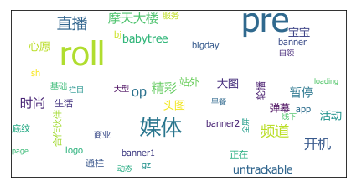

In [501]:
# 词云
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# from wordcloud_cn import WordCloud_CN

wc_fname = "%s.png"%('md_ads')
wc = WordCloud(font_path='msyh.ttf',
                background_color="white", max_words=100,
                max_font_size=40, random_state=42)

wc.generate_from_frequencies(tfidfDict)

fig = plt.imshow(wc.recolor())
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

In [502]:
df_words = pd.DataFrame(tfidf.todense(), columns= word)
topn_words= df_words.sum().sort_values(ascending=False)[:50].index
df_words= df_words[topn_words]
df_words.columns=[c+'__' for c in df_words.columns]


In [503]:
# 文本分类
# -*- coding: cp936 -*-
#-*- coding:utf-8 -*-
from PIL import Image,ImageDraw
import os, codecs, random
from math import sqrt
from sklearn.cluster import k_means, dbscan

# clusters = dbscan(df_words,eps=1, min_samples=10)
clusters = k_means(df_words,n_clusters=3)
clusters[1].shape
print('cluster to %d categories' % len(np.unique(clusters[1])))

cluster to 3 categories


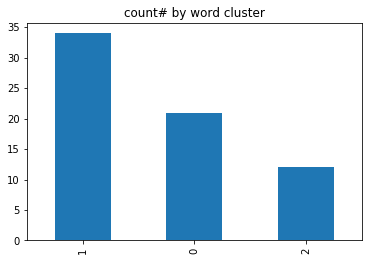

In [504]:
df_wcut['word_cluster'] = clusters[1]
df_wcut['word_cluster'].value_counts().plot(kind='bar', title='count# by word cluster');

cannot found meaningfull cluster  

In [505]:
display('top 5 keywords in each cluster:')
df_topn_words = pd.concat([df_wcut,df_words], axis=1)
df_cluster = df_wcut.groupby(['word_cluster']).size().sort_values(ascending = False)
for clusterNo, cnt in df_cluster[:30].iteritems():
    df_winc = df_topn_words[(df_topn_words.word_cluster==clusterNo)].drop(['Placement_Id','AdGroup','word_cluster'],axis=1).sum().sort_values(ascending=False)
    
    print('cluster %s(%s):'%(str(clusterNo), cnt) + ','.join(list(df_winc[df_winc>0].head(10).index)))
    

'top 5 keywords in each cluster:'

cluster 1(34):
cluster 0(21):头图__,媒体__,站外__,大图__,开机__,合作伙伴__,logo__,app__,底纹__,轮播__
cluster 2(12):媒体__


look at look at correlation between CTR and Cost/timeseries metrics

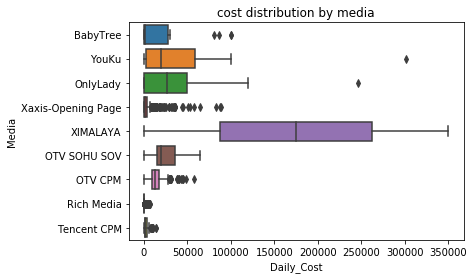

In [507]:
sns.boxplot('Daily_Cost', 'Media', data = df_cpm )
plt.title('cost distribution by media');

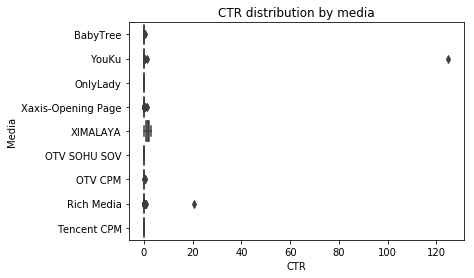

In [510]:
sns.boxplot('CTR', 'Media', data = df_cpm )
plt.title('CTR distribution by media');

remove outlier

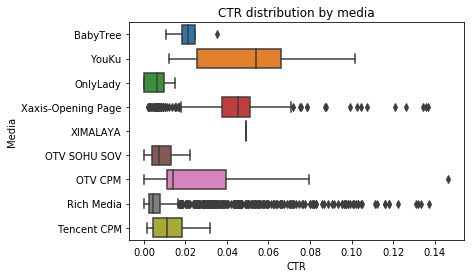

In [514]:
ctr_99 = df_cpm.CTR.quantile(.99)
df_cpm_outlier = df_cpm[df_cpm.CTR>ctr_99]
df_cpm_clean = df_cpm[df_cpm.CTR<=ctr_99]
sns.boxplot('CTR', 'Media', data = df_cpm_clean )
plt.title('CTR distribution by media');

fill na for Cum_CTR Avg_CTR_last3d Avg_CTR_last10d

In [543]:
(df_cpm_clean.isnull().sum()/df_cpm_clean.shape[0]).sort_values(ascending = False).head(10)

Cum_PV         0.722271
Cum_Imp2Pv     0.722271
Cum_UV         0.722271
Bounce_Rate    0.705882
UV             0.705590
PV             0.705590
UV/Clicks      0.705590
CPUV           0.705590
CTR_last7      0.677202
Cum_CTR        0.122622
dtype: float64

In [546]:
df_cum_CTR= df_cpm_clean.set_index(['Date']).groupby(level=0)['CTR'].transform(lambda g: g.shift(1).rolling(7, min_periods=1).mean()).rename('Cum_CTR').to_frame().reset_index()
df_cum_CTR = df_cum_CTR.fillna(df_cum_CTR.mean())
df_cpm_clean.loc[:,'CTR_last7'] = df_cum_CTR.Cum_CTR
nullctr_idx = df_cpm_clean[df_cpm_clean.Cum_CTR.isnull()].index
df_cpm_clean.loc[nullctr_idx,'Cum_CTR'] = df_cpm_clean.loc[nullctr_idx,'CTR_last7']

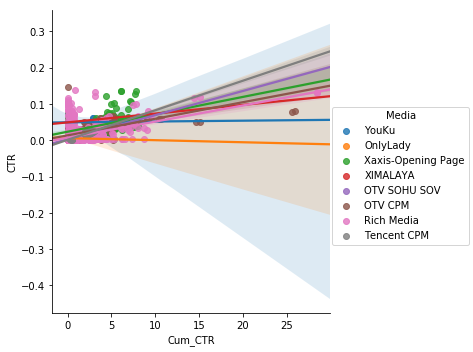

In [551]:
sns.lmplot('Cum_CTR', 'CTR',hue='Media', data = df_cpm_clean.query('Media!="BabyTree"'))

predict CTR using Cost/timeseries metrics


In [554]:
df_cpm.columns

Index(['Date', 'Month', 'Media_Type', 'AdGroup', 'Placement_Id', 'Product_Id',
       'Product_Cat', 'Geo_Target', 'Device', 'IOS/AND', 'Age', 'Sex',
       'Daily_Cost', 'Imp', 'Click', 'CTR', 'CPM', 'CPC', 'UV', 'PV',
       'Bounce_Rate', 'UV/Clicks', 'CPUV', 'Media', 'Placement',
       'Cum_Daily_Cost', 'Cum_Imp', 'Cum_Click', 'Cum_UV', 'Cum_PV', 'Cum_CTR',
       'Cum_CPM', 'Cum_Imp2Pv', 'Avg_CTR_last3d', 'Avg_CTR_last10d', 'qcost',
       'Daily_Cost_Log'],
      dtype='object')

In [555]:
df_train.describe()

,CTR,Cum_UV,Cum_PV,Cum_CTR,Cum_CPM,Cum_Imp2Pv,Avg_CTR_last3d,Avg_CTR_last10d
count,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000
mean,1.989563,22339.821543,25463.624163,1.668933,3.114772,0.011793,1.520809,1.510020
std,2.519175,85337.550203,95778.963966,2.184963,1.281884,0.027943,1.661984,1.664518
min,0.000241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.330739,0.000000,0.000000,0.230472,2.800000,0.000000,0.318015,0.279659
50%,0.768040,0.000000,0.000000,0.722955,2.800000,0.000000,0.587465,0.587439
75%,3.631162,348.500000,465.500000,2.740412,3.500000,0.005504,1.818749,1.820230
max,24.546952,667933.000000,729704.000000,28.481830,10.659996,0.296590,5.092325,5.073092


add features for holiday

In [593]:
import chinese_calendar as calendar

df_cpm_clean['CTR'] =  df_cpm_clean['Click'] / df_cpm_clean['Imp'] * 100
df_cpm_clean['date'] = df_cpm_clean['Date'].astype(pd.datetime)
df_cpm_clean['weekday'] = df_cpm_clean['date'].map(lambda x:x.weekday())
df_cpm_clean['weekofyear'] = df_cpm_clean['date'].map(lambda x:x.weekofyear)

day_holiday = {}
day_holiday_name = {}
for day in df_cpm_clean.date.unique():
    on_holiday, holiday_name = calendar.get_holiday_detail(day)
    day_holiday[day] = on_holiday 
    day_holiday_name[day] = holiday_name
    
df_cpm_clean['is_holiday'] = df_cpm_clean.date.map(day_holiday)
df_cpm_clean['holiday_name'] = df_cpm_clean.date.map(day_holiday_name).fillna('N/A')
#'Cum_UV','Cum_PV','Cum_Imp2Pv',
include_cols = ['CTR', 'Cum_CTR','Cum_CPM',  'Avg_CTR_last3d', 'Avg_CTR_last10d','Daily_Cost',
               'weekday','is_holiday']


df_train = df_cpm_clean.query('Media!="BabyTree"')[include_cols]
df_train = df_train.drop(df_wdone.columns, axis=1)
df_train = df_train[df_train['CTR']<25]
# df_train = df_train[df_train.Est_CTR!=np.inf]
df_train = df_train.fillna(0)
# md_lso = Lasso(selection ='random')
# md_lso.fit(df_X,df_y)
from auto_ml import predictor
column_descriptions = {'CTR':'output'}
pred = predictor.Predictor('regressor', column_descriptions=column_descriptions)
pred.train(df_train,model_names= ['LGBMRegressor'], perform_feature_scaling = True)
# pred.train_categorical_ensemble(df_train,'Product',model_names= ['LogisticRegression'], perform_feature_scaling = True)

Welcome to auto_ml! We're about to go through and make sense of your data using machine learning, and give you a production-ready pipeline to get predictions with.

If you have any issues, or new feature ideas, let us know at http://auto.ml
You are running on version 2.9.10
Now using the model training_params that you passed in:
{}
After overwriting our defaults with your values, here are the final params that will be used to initialize the model:
{'n_estimators': 2000, 'learning_rate': 0.15, 'num_leaves': 8, 'lambda_l2': 0.001, 'histogram_pool_size': 16384}
Running basic data cleaning
Performing feature scaling
Fitting DataFrameVectorizer
Now using the model training_params that you passed in:
{}
After overwriting our defaults with your values, here are the final params that will be used to initialize the model:
{'n_estimators': 2000, 'learning_rate': 0.15, 'num_leaves': 8, 'lambda_l2': 0.001, 'histogram_pool_size': 16384}


************************************************************

[214]	random_holdout_set_from_training_data's rmse: 0.716482
[215]	random_holdout_set_from_training_data's rmse: 0.715822
[216]	random_holdout_set_from_training_data's rmse: 0.715832
[217]	random_holdout_set_from_training_data's rmse: 0.715446
[218]	random_holdout_set_from_training_data's rmse: 0.714921
[219]	random_holdout_set_from_training_data's rmse: 0.715089
[220]	random_holdout_set_from_training_data's rmse: 0.715183
[221]	random_holdout_set_from_training_data's rmse: 0.716395
[222]	random_holdout_set_from_training_data's rmse: 0.717099
[223]	random_holdout_set_from_training_data's rmse: 0.717082
[224]	random_holdout_set_from_training_data's rmse: 0.716578
[225]	random_holdout_set_from_training_data's rmse: 0.716056
[226]	random_holdout_set_from_training_data's rmse: 0.71686
[227]	random_holdout_set_from_training_data's rmse: 0.717271
[228]	random_holdout_set_from_training_data's rmse: 0.717018
[229]	random_holdout_set_from_training_data's rmse: 0.716847
[230]	random_holdout_set_

[402]	random_holdout_set_from_training_data's rmse: 0.711269
[403]	random_holdout_set_from_training_data's rmse: 0.711865
[404]	random_holdout_set_from_training_data's rmse: 0.711688
[405]	random_holdout_set_from_training_data's rmse: 0.711384
[406]	random_holdout_set_from_training_data's rmse: 0.711472
[407]	random_holdout_set_from_training_data's rmse: 0.712084
[408]	random_holdout_set_from_training_data's rmse: 0.712102
[409]	random_holdout_set_from_training_data's rmse: 0.711948
[410]	random_holdout_set_from_training_data's rmse: 0.712058
[411]	random_holdout_set_from_training_data's rmse: 0.711833
[412]	random_holdout_set_from_training_data's rmse: 0.711575
[413]	random_holdout_set_from_training_data's rmse: 0.71147
[414]	random_holdout_set_from_training_data's rmse: 0.71188
[415]	random_holdout_set_from_training_data's rmse: 0.711772
[416]	random_holdout_set_from_training_data's rmse: 0.712035
[417]	random_holdout_set_from_training_data's rmse: 0.71201
[418]	random_holdout_set_fr

Finished training the pipeline!
Total training time:
0:00:01


Here are the results from our LGBMRegressor
predicting CTR
Calculating feature responses, for advanced analytics.
The printed list will only contain at most the top 100 features.
+--------+-----------------+--------------+---------+-------------------+-------------------+-----------+-----------+-----------+-----------+
|        | Feature Name    |   Importance |   Delta |   FR_Decrementing |   FR_Incrementing |   FRD_abs |   FRI_abs |   FRD_MAD |   FRI_MAD |
|--------+-----------------+--------------+---------+-------------------+-------------------+-----------+-----------+-----------+-----------|
| 6.0000 | is_holiday      |           18 |  0.2356 |           -0.0063 |           -0.0170 |    0.0070 |    0.0227 |    0.0000 |    0.0000 |
| 1.0000 | Cum_CPM         |          114 |  0.6370 |           -0.0841 |           -0.0480 |    0.1757 |    0.0569 |    0.1121 |    0.0000 |
| 5.0000 | weekday         |          197 |  0.9

In [594]:
from sklearn.metrics import r2_score, mean_absolute_error

y_hat = np.array(pred.predict(df_train))
y_hat[y_hat<=0] = 0.005

s1 = r2_score(df_train.CTR, y_hat)
s2 = mean_absolute_error(df_train.CTR, y_hat)
print('r2 = %f, mae=%f' %(s1, s2))

r2 = 0.936017, mae=0.303894


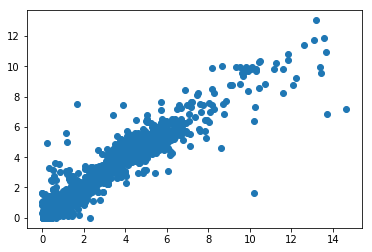

In [595]:
plt.scatter(df_train.CTR, y_hat);

Looks it's predicting well. Now let's check for the test and train score to make sure we're not overfitting.